<a href="https://colab.research.google.com/github/titusjscott/multi-layer-perceptron/blob/main/nfl_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/titusjscott/multi-layer-perceptron/main/nfl%20data%20project.csv")

In [3]:
df

,game_id,season,team,point_diff,wins,turnover_diff,off_pass_epa,off_rush_epa,def_pass_epa,def_rush_epa,home,dome,temp,wind
0,2002_01_ARI_WAS,2002,ARI,-8,0.0,0,0.043270,-0.030501,0.156047,0.097283,0,0,76,5
1,2002_01_ARI_WAS,2002,WAS,8,1.0,0,0.156047,0.097283,0.043270,-0.030501,1,0,76,5
2,2002_01_ATL_GB,2002,ATL,-3,0.0,0,0.146118,0.430746,0.369264,0.094688,0,0,83,9
3,2002_01_ATL_GB,2002,GB,3,1.0,0,0.369264,0.094688,0.146118,0.430746,1,0,83,9
4,2002_01_BAL_CAR,2002,BAL,-3,0.0,-1,-0.054817,-0.015860,0.006126,-0.094776,0,0,78,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,2021_18_SF_LA,2021,SF,3,1.0,0,0.167524,0.030746,0.356886,-0.368872,0,1,70,0
10268,2021_18_TEN_HOU,2021,HOU,-3,0.0,0,0.237720,0.053259,0.641079,-0.131478,1,0,70,0
10269,2021_18_TEN_HOU,2021,TEN,3,1.0,0,0.641079,-0.131478,0.237720,0.053259,0,0,70,0
10270,2021_18_WAS_NYG,2021,NYG,-15,0.0,-3,-0.333775,-0.584925,-0.356750,0.181794,1,0,70,0


In [6]:
df = df.iloc[:,3:]
df

,point_diff,wins,turnover_diff,off_pass_epa,off_rush_epa,def_pass_epa,def_rush_epa,home,dome,temp,wind
0,-8,0.0,0,0.043270,-0.030501,0.156047,0.097283,0,0,76,5
1,8,1.0,0,0.156047,0.097283,0.043270,-0.030501,1,0,76,5
2,-3,0.0,0,0.146118,0.430746,0.369264,0.094688,0,0,83,9
3,3,1.0,0,0.369264,0.094688,0.146118,0.430746,1,0,83,9
4,-3,0.0,-1,-0.054817,-0.015860,0.006126,-0.094776,0,0,78,12
...,...,...,...,...,...,...,...,...,...,...,...
10267,3,1.0,0,0.167524,0.030746,0.356886,-0.368872,0,1,70,0
10268,-3,0.0,0,0.237720,0.053259,0.641079,-0.131478,1,0,70,0
10269,3,1.0,0,0.641079,-0.131478,0.237720,0.053259,0,0,70,0
10270,-15,0.0,-3,-0.333775,-0.584925,-0.356750,0.181794,1,0,70,0


In [7]:
# the wins column in index position 1 is our target feature. Lets move it to index 0 to make our code more simple later
wins = df.iloc[:,1]

# drop the wins column from the df
df=df.drop(df.columns[1], axis=1)

# insert the wins column back into the df in index position 0
df.insert(0, "wins", wins)

df

,wins,point_diff,turnover_diff,off_pass_epa,off_rush_epa,def_pass_epa,def_rush_epa,home,dome,temp,wind
0,0.0,-8,0,0.043270,-0.030501,0.156047,0.097283,0,0,76,5
1,1.0,8,0,0.156047,0.097283,0.043270,-0.030501,1,0,76,5
2,0.0,-3,0,0.146118,0.430746,0.369264,0.094688,0,0,83,9
3,1.0,3,0,0.369264,0.094688,0.146118,0.430746,1,0,83,9
4,0.0,-3,-1,-0.054817,-0.015860,0.006126,-0.094776,0,0,78,12
...,...,...,...,...,...,...,...,...,...,...,...
10267,1.0,3,0,0.167524,0.030746,0.356886,-0.368872,0,1,70,0
10268,0.0,-3,0,0.237720,0.053259,0.641079,-0.131478,1,0,70,0
10269,1.0,3,0,0.641079,-0.131478,0.237720,0.053259,0,0,70,0
10270,0.0,-15,-3,-0.333775,-0.584925,-0.356750,0.181794,1,0,70,0


In [11]:
df.describe()

,wins,point_diff,turnover_diff,off_pass_epa,off_rush_epa,def_pass_epa,def_rush_epa,home,dome,temp,wind
count,10272.00000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000
mean,0.50000,0.000000,0.000000,0.055884,-0.107484,0.055884,-0.107484,0.500000,0.236955,62.223326,5.887266
std,0.49944,14.964814,1.923419,0.306372,0.218540,0.306372,0.218540,0.500024,0.425235,14.819873,5.930729
min,0.00000,-59.000000,-7.000000,-1.846674,-2.397154,-1.846674,-2.397154,0.000000,0.000000,1.000000,0.000000
25%,0.00000,-8.000000,-1.000000,-0.143844,-0.236188,-0.143844,-0.236188,0.000000,0.000000,53.000000,0.000000
50%,0.50000,0.000000,0.000000,0.058737,-0.098012,0.058737,-0.098012,0.500000,0.000000,70.000000,5.000000
75%,1.00000,8.000000,1.000000,0.253104,0.032312,0.253104,0.032312,1.000000,0.000000,70.000000,9.000000
max,1.00000,59.000000,7.000000,1.454189,0.809347,1.454189,0.809347,1.000000,1.000000,102.000000,71.000000


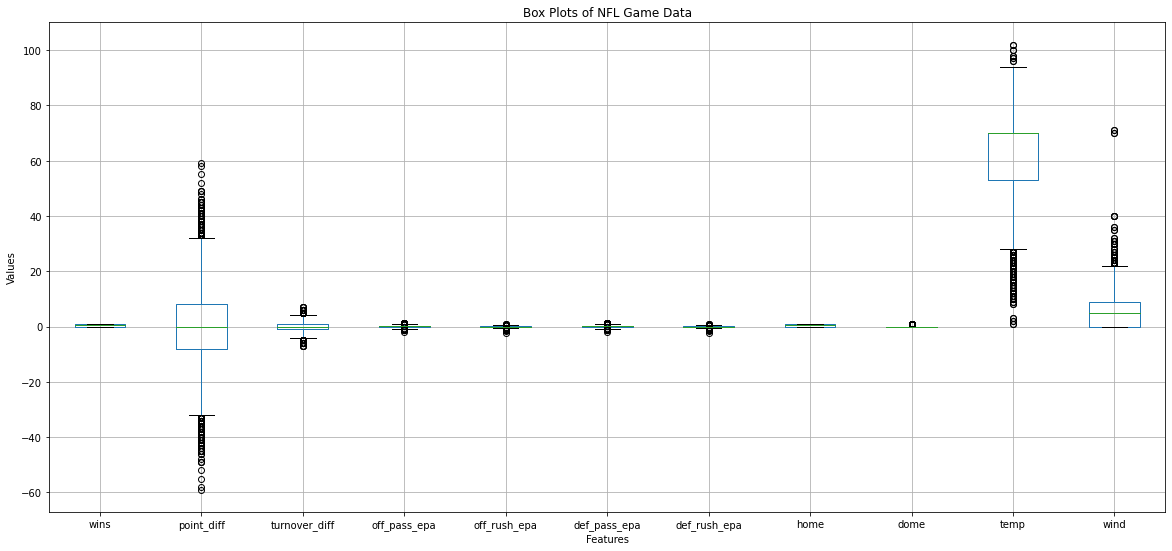

In [20]:
fig, ax = plt.subplots(figsize=(20,10))


df.boxplot(ax=ax)

ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Box Plots of NFL Game Data')

plt.subplots_adjust(bottom=0.2)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

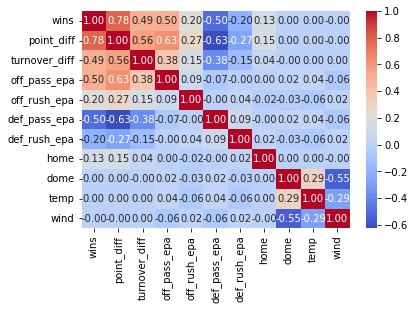

In [9]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

plt.show